# Project: Investigate a Dataset (No-show appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#ask">Asking Questions</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Business Understanding

A person makes a doctor appointment, receives all the instructions and no-show. Who to blame?

This dataset collects information from 110527 medical appointments in Brazil from ('2016-04-29') to ('2016-06-08')  and is focused on the question of whether or not patients show up for their appointment.

Problem: Many patients book the appointment with doctor then didn't show up on scheduled day.

Objective of the analysis: Investigate What factors are important for us to know in order to predict if a patient will
show up for their scheduled appointment?.

### Features :
- PatientId: Identification of the patient

- AppointmentID: Identification of the appointment

- Gender: M=>Male & F=>Female.

- AppointmentDay: The day of Appointment.

- ScheduledDay: Tells us on what day the patient set up their appointment.

- Age: Patient's age.

- Neighborhood: indicates the location of the hospital.

- Scholarship: indicates whether or not the patient is enrolled in Brasilian <a href='https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia'>welfare program</a>

- Hipertension: True or False

- Diabetes: True or False

- Alcoholism: True or False

- Handcap: handicap rate (0 to 4)

- SMS_received: True or False.

- No-show: True or False.

Data set url <a href='https://www.kaggle.com/joniarroba/noshowappointments'>noshowappointments</a>

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Custom Functions

- Drop columns from data frame in place:

In [2]:
def drop_df_columns(df,cols_list):
    df.drop(columns=cols_list,inplace=True)

- To DateTime FataFrame Columns Converting

In [3]:
def df_columns_to_datetime(df,cols_list):
    for i in cols_list:
        df[i]=pd.to_datetime(df[i])

- Rename DataFrame Columns 

In [4]:
def df_rename_cols(df,col_name_dict):
    df.rename(columns=col_name_dict,inplace=True)

<a id='ask'></a>
## 1- Asking Questions

Q1 Is there any Correlation between features and patient's show up?

Q2 Is SMS_received , gender and scholarship affect the patient's show up?

Q3 Is any deseases (Hipertension , Diabetes or Handcap ) affect the patient's show up?

Q4 Is Appointment Day of the week and the month affect the patient's show up?

Q5 Is Alcoholism affect the patient's show up?

Q6 Is the average of age affect the patient's show up?

Q7 Is the waiting days affect the patient's show up?

Q8 What factors areimportant for us to know in order to predict if a patient will show up for their scheduled appointment up?

<a id='wrangling'></a>
## 2- Data Wrangling

<ul>
<li><a href="#gather">Gathering Data</a></li>
<li><a href="#assess">Assessing Data</a></li>
<li><a href="#clean">Cleaning Data</a></li>
</ul>

 <a id='gather'></a>
### a) Gathering Data

- As mentiond before in <a href="#intro">introduction</a> DataSet downloaded from <a href='https://www.kaggle.com/joniarroba/noshowappointments'>noshowappointments</a> 

In [5]:
df=pd.read_csv(r'noshowappointments-KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


 <a id='assess'></a>
### b) Assessing Data 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


- as we can see there are 14 feature columns and 110527 row with out any null values.
- PatientId and AppointmentID features hasn't predict power because so:
    - remove PatientId column.
    - remove AppointmentID column.
- some data types need to be converted :
    - ScheduledDay to datetime
    - AppointmentDay to datetime

- Check duplicated rows.

In [7]:
df.duplicated().sum()

0

- there is no dublicated rows

In [8]:
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

- map M to male and F to female is better representive

In [9]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

- Convert No-show to is show to reduse confusion:
    - this required map yes to 0 and no to 1 and then convert column data type to int

- rename all columns to lower case and split tow sections word by  _

In [10]:
df['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [11]:
df[df['Age']==0]['Age'].count()

3539

- removing data with age < 0 but we will accept the max value 115 because it is possible 
- 3539 with age zero acceptable because my born up to 11 month ago.

In [12]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [13]:
df.Handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

- rename Handcap column to handicap

### Assess conclusions:
- Remove PatientId column.
- Remove AppointmentID column.
- Convert ScheduledDay column datatype to datetime
- Convert AppointmentDay column datatype to datetime
- map M to male and F to female better representive
- Convert No-show to is show to reduse confusion and map yes to 0 and no to 1 and then convert column data type to int.
- rename all columns to lower case and split tow sections word by _
- removing data with age < 0
- rename Handcap column to handicap

 <a id='clean'></a>
### b) Cleaning Data 

#### steps:

1- Copy data fram to new one

In [14]:
df_new=df.copy()

2- Remove un needed columns PatientId and AppointmentID

In [15]:
drop_df_columns(df_new,['PatientId','AppointmentID'])
df_new.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


3- Convert ScheduledDay and AppointmentDay to datatime data type

In [16]:
df_columns_to_datetime(df_new,['ScheduledDay','AppointmentDay'])
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 10.1+ MB


4 - map M to male and F to female

In [17]:
df_new['Gender']=df_new['Gender'].map({'M':'male','F':'female'})
df_new['Gender'].value_counts()

female    71840
male      38687
Name: Gender, dtype: int64

In [18]:
df_new.shape

(110527, 12)

4 - removing data with age less than 0

In [19]:
df_new=df_new[df_new['Age']>=0]
df_new.shape

(110526, 12)

5 rename columns:
- rename all columns to lower case and split tow sections word by _
- rename Handcap column to handicap

In [20]:
df_new.columns.values

array(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'No-show'], dtype=object)

In [21]:
df_rename_cols(df_new,lambda x:x.lower().replace('-','_'))
df_new.columns.values

array(['gender', 'scheduledday', 'appointmentday', 'age', 'neighbourhood',
       'scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap',
       'sms_received', 'no_show'], dtype=object)

In [22]:
df_rename_cols(df_new,{'scheduledday':'scheduled_day','appointmentday':'appointment_day','handcap':'handicap'})
df_new.columns.values

array(['gender', 'scheduled_day', 'appointment_day', 'age',
       'neighbourhood', 'scholarship', 'hipertension', 'diabetes',
       'alcoholism', 'handicap', 'sms_received', 'no_show'], dtype=object)

6 - Convert No-show to is show to reduse confusion and map yes to 0 and no to 1 and then convert column data type to int.

In [23]:
df_new['no_show']=df_new['no_show'].map({'Yes':0,'No':1})
df_rename_cols(df_new,{'no_show':'show'})
df_new['show']=df_new['show'].astype(int)
df_new['show'].value_counts()

1    88207
0    22319
Name: show, dtype: int64

7 - adding new column to diffrence between Scheduled Day and Appointment Day 

In [24]:
df_new['waiting_days']=df_new['appointment_day']-df_new['scheduled_day']
df_new['waiting_days'].describe()

count                     110526
mean      9 days 17:08:42.047952
std      15 days 05:51:31.240428
min            -7 days +10:10:40
25%            -1 days +15:41:32
50%              3 days 11:22:33
75%      14 days 07:41:37.750000
max            178 days 13:19:01
Name: waiting_days, dtype: object

In [25]:
df_new['waiting_days']=df_new['waiting_days'].astype(str).apply(lambda x:x.split()[0]).astype(int)
df_new['waiting_days'].describe()

count    110526.000000
mean          9.183794
std          15.255034
min          -7.000000
25%          -1.000000
50%           3.000000
75%          14.000000
max         178.000000
Name: waiting_days, dtype: float64

- as we see min waiting_days is -7 and Q1 is -1 day so we need to drop this invalid data because appointment_day must be greater than or equal to scheduled_day 

In [26]:
df_new=df_new[df_new['waiting_days'] >=0]

In [27]:
df_new.describe(include='all')

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,show,waiting_days
count,71959,71959,71959,71959.000000,71959,71959.000000,71959.000000,71959.000000,71959.000000,71959.000000,71959.000000,71959.000000,71959.000000
unique,2,68666,27,NaN,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,female,2016-04-25 17:18:27,2016-06-06 00:00:00,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,48070,22,3073,NaN,5213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2015-11-10 07:13:56,2016-04-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2016-06-07 19:03:57,2016-06-08 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,38.502564,NaN,0.092706,0.208897,0.074723,0.025320,0.020025,0.493086,0.714810,14.642018
std,NaN,NaN,NaN,22.925421,NaN,0.290021,0.406523,0.262946,0.157096,0.154072,0.499956,0.451508,16.494334
min,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000


8- split appointment_day and scheduled_day into date , time , hour and day of the week to make more analysis 

In [28]:
df_new['appointment_date']=df_new['appointment_day'].dt.date
df_new['appointment_time']=df_new['appointment_day'].dt.time
df_new['appointment_dow']=df_new['appointment_day'].dt.day_name()
df_new['appointment_hour']=df_new['appointment_day'].dt.hour
df_new['appointment_month']=df_new['appointment_day'].dt.month_name()

In [29]:
df_new.sample(10)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,show,waiting_days,appointment_date,appointment_time,appointment_dow,appointment_hour,appointment_month
12930,female,2016-04-05 08:24:32,2016-05-31,67,MONTE BELO,0,1,1,0,0,1,1,55,2016-05-31,00:00:00,Tuesday,0,May
88648,female,2016-05-16 10:27:53,2016-06-03,59,PRAIA DO CANTO,0,1,1,0,0,1,0,17,2016-06-03,00:00:00,Friday,0,June
9956,female,2016-04-28 07:29:03,2016-05-04,39,ROMÃO,0,0,0,0,0,0,1,5,2016-05-04,00:00:00,Wednesday,0,May
5609,female,2016-05-13 14:52:06,2016-05-16,35,ILHA DO PRÍNCIPE,0,0,0,0,0,0,1,2,2016-05-16,00:00:00,Monday,0,May
63377,female,2016-05-11 11:51:47,2016-05-19,36,JARDIM DA PENHA,0,0,0,0,0,0,1,7,2016-05-19,00:00:00,Thursday,0,May
28237,male,2016-04-26 17:21:21,2016-05-24,30,REPÚBLICA,0,0,0,0,0,1,1,27,2016-05-24,00:00:00,Tuesday,0,May
107608,female,2016-06-06 12:01:13,2016-06-07,9,NAZARETH,0,0,0,0,0,0,1,0,2016-06-07,00:00:00,Tuesday,0,June
44407,female,2016-04-29 09:56:52,2016-05-17,27,JABOUR,1,0,0,0,0,0,0,17,2016-05-17,00:00:00,Tuesday,0,May
100842,male,2016-05-16 16:34:04,2016-06-01,41,BENTO FERREIRA,0,0,0,0,0,1,1,15,2016-06-01,00:00:00,Wednesday,0,June
46876,female,2016-04-19 07:26:08,2016-05-10,52,SANTA CECÍLIA,0,1,0,0,0,0,1,20,2016-05-10,00:00:00,Tuesday,0,May


In [30]:
df_new['appointment_time'].nunique()

1

9- Drop it and appointment_hour because all rows with the same appointment_time .

In [31]:
drop_df_columns(df_new,['appointment_time','appointment_hour'])
df_new.sample(10)

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handicap,sms_received,show,waiting_days,appointment_date,appointment_dow,appointment_month
35178,female,2016-04-26 08:02:08,2016-05-06,34,ENSEADA DO SUÁ,0,0,0,0,0,1,0,9,2016-05-06,Friday,May
39434,female,2016-05-12 16:42:09,2016-05-17,49,MARIA ORTIZ,0,0,0,0,0,0,1,4,2016-05-17,Tuesday,May
107174,female,2016-04-05 15:16:56,2016-06-01,39,FRADINHOS,0,0,0,0,0,1,0,56,2016-06-01,Wednesday,June
50148,male,2016-04-05 15:14:18,2016-05-03,64,JARDIM DA PENHA,0,1,0,0,0,1,1,27,2016-05-03,Tuesday,May
13882,female,2016-05-24 07:56:19,2016-05-30,6,SANTA TEREZA,0,0,0,0,0,1,1,5,2016-05-30,Monday,May
31037,female,2016-05-05 09:55:32,2016-05-06,31,CENTRO,0,0,0,0,0,0,1,0,2016-05-06,Friday,May
57278,female,2016-04-26 07:28:56,2016-05-30,9,CRUZAMENTO,0,0,0,0,0,1,1,33,2016-05-30,Monday,May
24569,female,2016-05-06 08:02:47,2016-05-10,60,SANTO ANDRÉ,0,1,0,0,0,1,1,3,2016-05-10,Tuesday,May
21139,female,2016-05-17 07:06:42,2016-05-19,63,MARUÍPE,0,0,0,0,0,0,0,1,2016-05-19,Thursday,May
44120,female,2016-04-18 10:03:22,2016-05-10,1,SÃO PEDRO,0,0,0,0,0,1,1,21,2016-05-10,Tuesday,May


- now , we finished cleaning data so save data to csv and then start EDA

In [32]:
df_new.to_csv('noshowappointments_cleaned.csv',index=False)

<a id='eda'></a>
## Exploratory Data Analysis

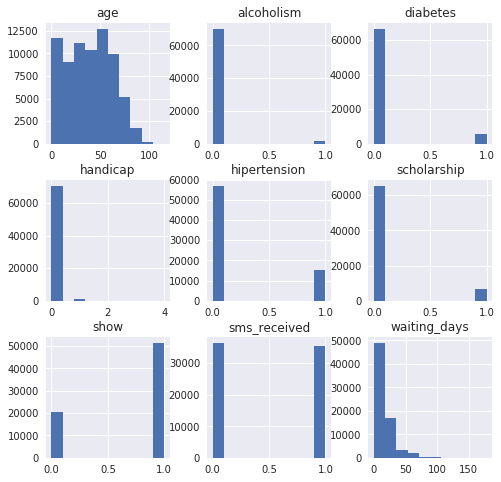

In [33]:
df_cleaned=pd.read_csv(r'noshowappointments_cleaned.csv')
df_cleaned.hist(figsize=(8,8));

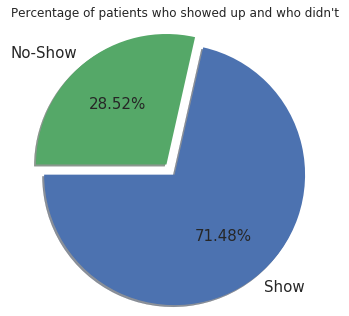

In [34]:
label_Names = ["Show", "No-Show"]
data = [df_cleaned.query('show == 1').count()[0], df_cleaned.query('show == 0').count()[0]]
explode = (0, 0.15)
plt.axis('equal'); 
plt.pie(data,radius=1.5,shadow=True ,labels = label_Names,explode=explode, startangle=180,autopct='%0.2f%%',textprops = {"fontsize":15})
plt.title("Percentage of patients who showed up and who didn't",y=1.2);

### Research Question 1 (Is there any Correlation between features and patient's show?)

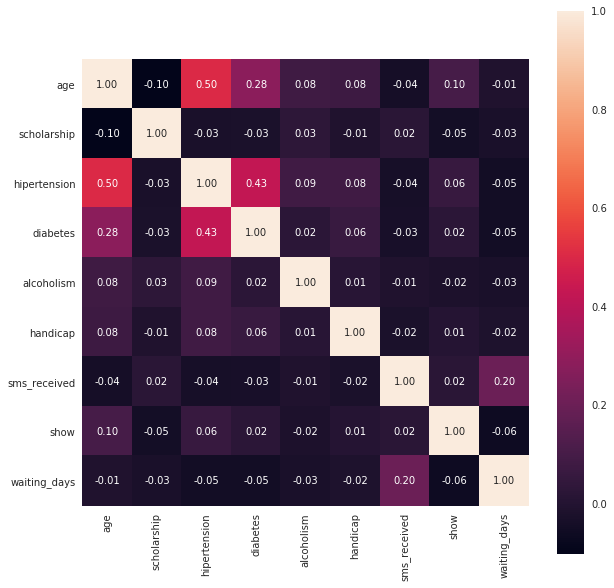

In [35]:
correlation = df_cleaned.corr()
fig, axes = plt.subplots(figsize=(10,10))
sns.heatmap(correlation, vmax=1, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10});

- Heatmap shows three correlations:

    - hipertension and age

    - hipertension and diabetes

    - diabetes and age

- There is no strong correlation between any feature with show

### Research Question 2  (Is SMS_received , gender and scholarship affect the patient's show?)

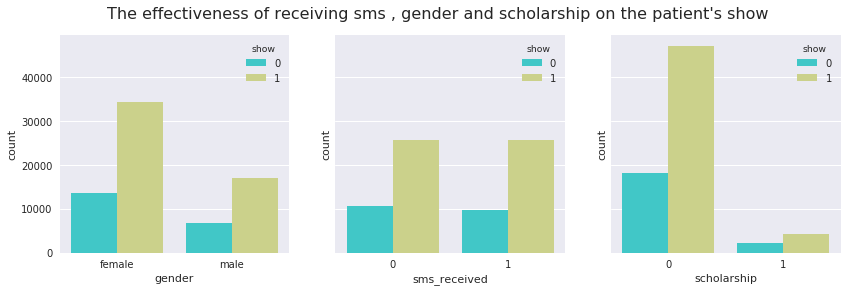

In [36]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)
sns.countplot(x='gender', data=df_cleaned, hue='show', ax=ax1, palette='rainbow')
sns.countplot(x='sms_received', data=df_cleaned, hue='show', ax=ax2, palette='rainbow')
sns.countplot(x='scholarship', data=df_cleaned, hue='show', ax=ax3, palette='rainbow')
fig.set_figwidth(14)
fig.set_figheight(4)
fig.suptitle("The effectiveness of receiving sms , gender and scholarship on the patient's show", fontsize=16);

- from bar chart of gender we found females percentage greatter than males

In [37]:
df_cleaned['gender'].value_counts()

female    48070
male      23889
Name: gender, dtype: int64

In [38]:
male_percentage=(df_cleaned['gender'].value_counts()[1]/df_cleaned['gender'].value_counts().sum())*100
male_percentage


33.198071123834403

In [39]:
df_cleaned.query('show==1')['gender'].value_counts()

female    34396
male      17041
Name: gender, dtype: int64

In [40]:
male_ratio=df_cleaned.query('show==1')['gender'].value_counts()[1]/df_cleaned['gender'].value_counts()[1]
female_ratio=df_cleaned.query('show==1')['gender'].value_counts()[0]/df_cleaned['gender'].value_counts()[0]
female_ratio,male_ratio

(0.7155398377366341, 0.71334086818200848)

- Both genders have same commitment to medical schedules. (71 %)

- sms doesn't affect on patient's show

- this data is imbalanced because males represent 33.2% of observations

- Number of patients who have scholarship is very small

### Research Question 3  (are deseases like Hipertension , Diabetes and Handicap  affect the patient's show?)

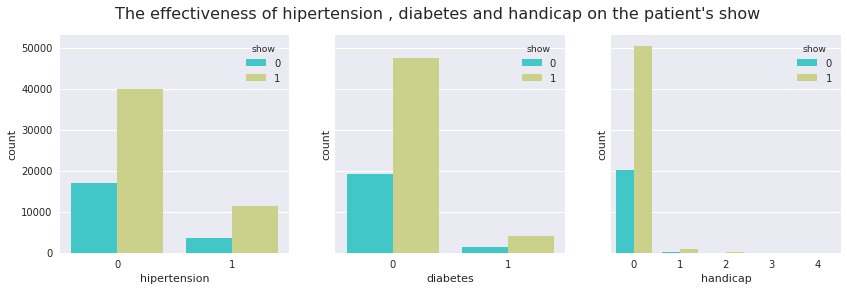

In [41]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)
sns.countplot(x='hipertension', data=df_cleaned, hue='show', ax=ax1, palette='rainbow')
sns.countplot(x='diabetes', data=df_cleaned, hue='show', ax=ax2, palette='rainbow')
sns.countplot(x='handicap', data=df_cleaned, hue='show', ax=ax3, palette='rainbow')
fig.set_figwidth(14)
fig.set_figheight(4)
fig.suptitle("The effectiveness of hipertension , diabetes and handicap on the patient's show", fontsize=16);

- hipertension has signficant effect on the patient's show up , but  diabetes and handicap has insignficant effect on the patient's show up

### Research Question 4  (Is Appointment Day of the week affect the patient's show?)

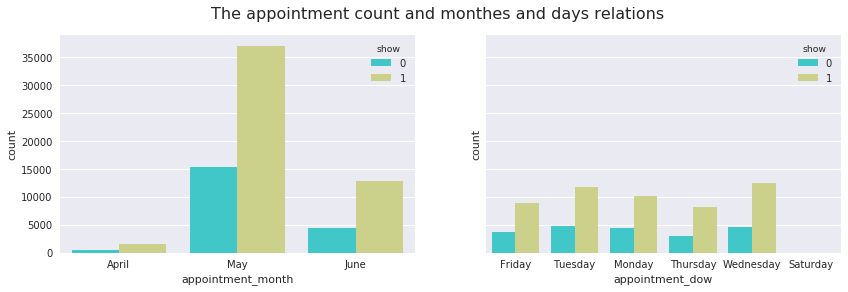

In [42]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.countplot(x='appointment_month', data=df_cleaned, hue='show', ax=ax1, palette='rainbow')
sns.countplot(x='appointment_dow', data=df_cleaned, hue='show', ax=ax2, palette='rainbow')
fig.set_figwidth(14)
fig.set_figheight(4)
fig.suptitle("The appointment count and monthes and days relations", fontsize=16);

In [43]:
df_cleaned['appointment_dow'].value_counts()

Wednesday    17044
Tuesday      16462
Monday       14581
Friday       12516
Thursday     11325
Saturday        31
Name: appointment_dow, dtype: int64

In [44]:
df_cleaned['appointment_date'].min(),df_cleaned['appointment_date'].max()

('2016-04-29', '2016-06-08')

- 'May' the highest month when patients make appointment , but data already collected from 2016-04-29 to 2016-06-08 so this chart does not give information in terms of the difference between the months
- Tuesday,Wednesday highest days when patients make appointment.
- Saturday lowest ptients appoinment 

### Research Question 5  (Is Alcoholism affect the patient's show?)

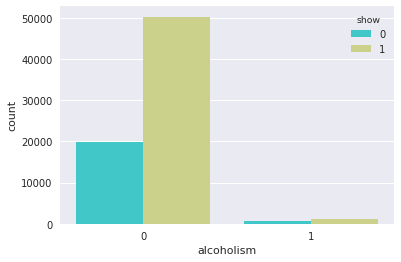

In [45]:
sns.countplot(x='alcoholism', data=df_cleaned, hue='show', palette='rainbow')
fig.set_figwidth(15)
fig.set_figheight(5)

- alcoholism  has not effect on the patient's show

### Research Question 6  (Is the age affect the patient's show?)

In [46]:
df_cleaned.describe()['age']

count    71959.000000
mean        38.502564
std         22.925421
min          0.000000
25%         19.000000
50%         39.000000
75%         57.000000
max        115.000000
Name: age, dtype: float64

In [47]:
df_age=df_cleaned.copy()
bins=[df_cleaned.describe()['age']['min'],df_cleaned.describe()['age']['25%'],df_cleaned.describe()['age']['50%'],df_cleaned.describe()['age']['75%'],
     df_cleaned.describe()['age']['max']]
bins_labels=['childs','young-adults','middel-age-adults','old-adults']
df_age['age_level']=pd.cut(df_age['age'],bins,labels=bins_labels)

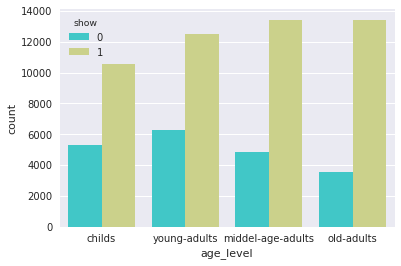

In [48]:
sns.countplot(x='age_level', data=df_age, hue='show', palette='rainbow')
fig.set_figwidth(15)
fig.set_figheight(5)

- young adults from 19 to 39 years old are the highest missed show up

### Research Question 7  (Is the waiting days affect the patient's show?)

In [49]:
df_valid_waiting_days=df_cleaned.query('waiting_days >= 0').copy()
df_valid_waiting_days.shape

(71959, 16)

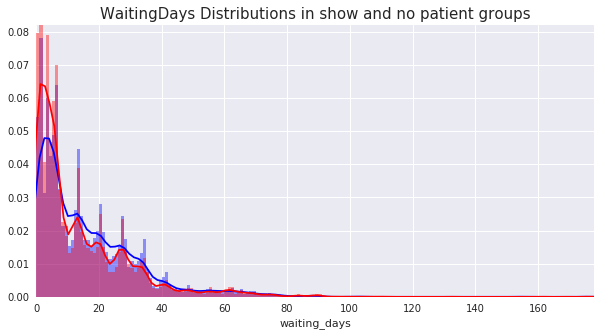

In [50]:
plt.figure(figsize=(10, 5))

sns.distplot(df_valid_waiting_days[df_valid_waiting_days['show'] == 0]["waiting_days"], bins=df_valid_waiting_days['waiting_days'].max(),color='blue' ,kde=True)
sns.distplot(df_valid_waiting_days[df_valid_waiting_days['show'] == 1]["waiting_days"], bins=df_valid_waiting_days['waiting_days'].max(), color='red', kde=True)

plt.title('WaitingDays Distributions in show and no patient groups', fontsize=15)
plt.xlim(df_valid_waiting_days['waiting_days'].min(),df_valid_waiting_days['waiting_days'].max())
plt.show()

- waiting days until 7 days  patient show up is higher ratio after 7 days missed show up is higher ratio .

### Research Question 8  (What factors areimportant for us to know in order to predict if a patient will show up for their scheduled appointment?)

In [51]:
df_neighbourhood=pd.DataFrame(data=df_cleaned['neighbourhood'].value_counts())
df_neighbourhood.reset_index(level=0, inplace=True)
df_neighbourhood.rename(columns={'neighbourhood':'appointment_count','index':'neighbourhood'},inplace=True)

df_neighbourhood_show =pd.DataFrame(data=df_cleaned.query('show == 1')['neighbourhood'].value_counts())
df_neighbourhood_show.reset_index(level=0, inplace=True)
df_neighbourhood_show.rename(columns={'neighbourhood':'show_count','index':'neighbourhood'},inplace=True)
df_neighbourhood_show

df_neighbourhood_combined=df_neighbourhood.merge(df_neighbourhood_show , left_on='neighbourhood' ,right_on='neighbourhood',how='inner')
df_neighbourhood_combined['show_up_ratio']=df_neighbourhood_combined['show_count']/df_neighbourhood_combined['appointment_count']
df_neighbourhood_combined

,neighbourhood,appointment_count,show_count,show_up_ratio
0,JARDIM CAMBURI,5213,3854,0.739306
1,MARIA ORTIZ,3730,2592,0.694906
2,RESISTÊNCIA,2818,1961,0.695884
3,JARDIM DA PENHA,2655,2058,0.775141
4,ITARARÉ,2381,1512,0.635027
5,CENTRO,2270,1617,0.712335
6,TABUAZEIRO,1924,1398,0.726611
7,JESUS DE NAZARETH,1755,1097,0.625071
8,BONFIM,1708,1195,0.699649
9,CARATOÍRA,1691,1150,0.680071


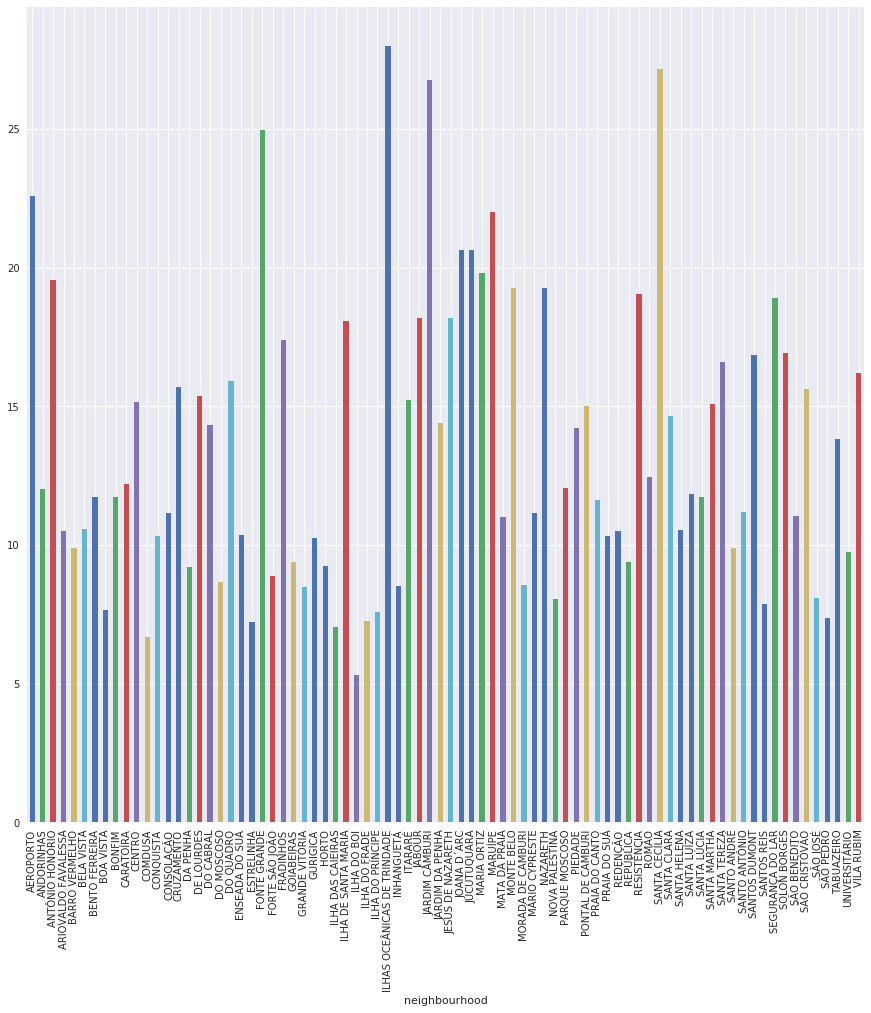

In [52]:
df_cleaned.groupby('neighbourhood')['waiting_days'].mean().plot(kind='bar',figsize=(15,15),fontsize=10);

- JARDIM CAMBURI the highst location of the hospital appointment that mean these hosbital in the middel of city or has Excellent doctors but because of having third highest wating days mean alot of patients missing show up.
- ILHA DO BOI has the higest show up ratio and lowest wating days mean because of patient appointment is 23.
- this is normal relation between number of appointments and wating days so they must distribute patients on hosbital accoreding Hospital Accommodation

- the important factors to know in order to predict if a patient will show up for their scheduled appointment:
    - hipertension , Age and neighbourhood

<a id='conclusions'></a>
## Conclusions

### Conclusions Results:
- Percentage of patients who show up on their appointments represents 71.48%
- Percentage of patients who Don't show up on their appointments represents 28.52%
- There is no strong correlation between any feature with show up.
- Both genders have same commitment to medical schedules. (71 %)
- Sms doesn't affect on patient's show up.
- young adults from 19 to 39 years old are the highest missed show up
- Patients Who didn't show up have more than 7 days of waiting.
- Patients Who show up have less than or equal 7 days .
- Relation between wating days and show up is negative.
- JARDIM CAMBURI  is the most frequent place.
- ILHA DO BOI has the higest show up ratio .
- The important factors affect patient show up are: hipertension , Age and neighbourhood
### limitations:
- Data is imbalanced because males represent 33.2% of observations.
- Data collected from 2016-04-29 to 2016-06-08 .
- some patients who marked as no show up, in real they may show up but on another day
- Data must include time of sending sms to detect if sms send before appointment day with enough time or send after appointment day.